In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import seaborn as sns
import re
from pathlib import Path
import pickle as pkl
from time import time
from datetime import datetime
from tqdm import tqdm, tnrange, tqdm_notebook
from pprint import pprint
import os, sys
from warnings import warn
import itertools
from collections import Counter

In [3]:
mpl.rcParams.update({'font.size': 12})

In [4]:
DATA = Path(r'd:\media\videos\ayalon')
files = [f for f in os.listdir(DATA) if f.endswith('.mp4')]
print(len(files))
print(files[:3])
print(files[-3:])

73
['20190520_105429.mp4', '20190520_112342.mp4', '20190520_141707.mp4']
['20190625_104635.mp4', '20190625_143626.mp4', '20190625_170421.mp4']


In [5]:
dt = [datetime(int(f[:4]),int(f[4:6]),int(f[6:8]),int(f[9:11]),int(f[11:13]),int(f[13:15])) for f in files]
dt[:3]

[datetime.datetime(2019, 5, 20, 10, 54, 29),
 datetime.datetime(2019, 5, 20, 11, 23, 42),
 datetime.datetime(2019, 5, 20, 14, 17, 7)]

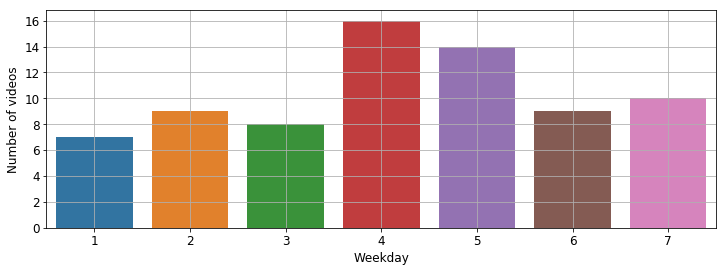

In [6]:
weekdays = [(d.weekday() + 1) % 7 + 1 for d in dt] # Hebrew format, i.e. 1 = Sunday, 7 = Saturday

count = Counter(weekdays)

plt.figure(figsize=(12,4))
sns.barplot(x=list(count.keys()), y=list(count.values()))
plt.xlabel('Weekday')
plt.ylabel('Number of videos')
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

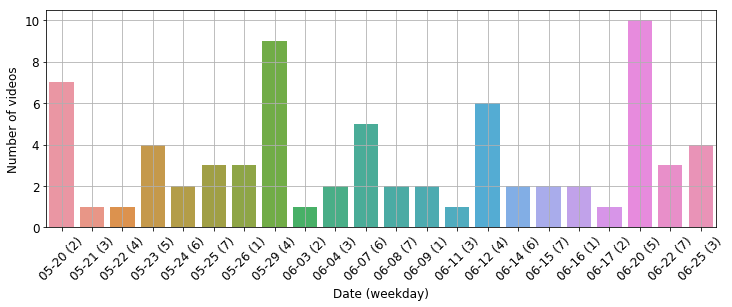

In [7]:
count = Counter([d.strftime(f'%m-%d ({wd:d})') for d,wd in zip(dt,weekdays)])

plt.figure(figsize=(12,4))
sns.barplot(x=list(count.keys()), y=list(count.values()))
plt.xlabel('Date (weekday)')
plt.ylabel('Number of videos')
plt.grid()
plt.xticks(rotation=45)

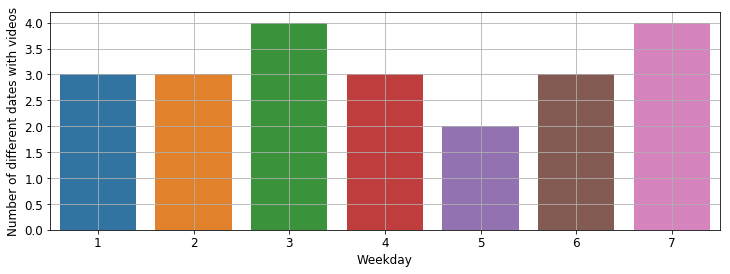

In [8]:
count = Counter([(d.weekday() + 1) % 7 + 1 for d in np.unique([d.date() for d in dt])])

plt.figure(figsize=(12,4))
sns.barplot(x=list(count.keys()), y=list(count.values()))
plt.xlabel('Weekday')
plt.ylabel('Number of different dates with videos')
plt.grid()

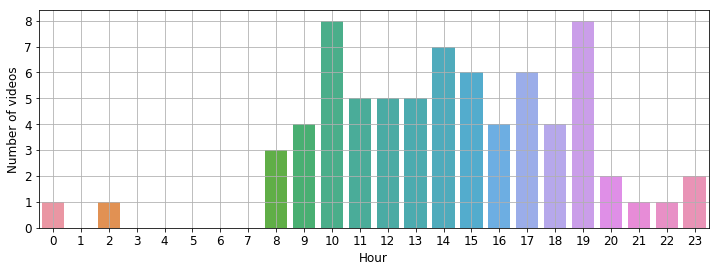

In [9]:
count = Counter([d.hour for d in dt])
count = {h: (count[h] if h in count else 0) for h in list(range(6,24))+list(range(0,6))}

plt.figure(figsize=(12,4))
sns.barplot(x=list(count.keys()), y=list(count.values()))
plt.xlabel('Hour')
plt.ylabel('Number of videos')
plt.grid()

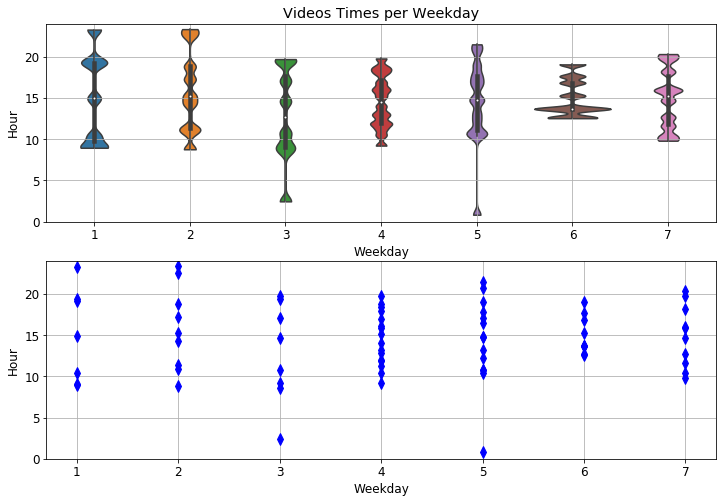

In [10]:
times = [d.hour+d.minute/60+d.second/3600 for d in dt]

_, axs = plt.subplots(2,1, figsize=(12,8))

ax = axs[0]
sns.violinplot(x = weekdays, y = times, cut=0, bw=0.1, ax=ax)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
ax.set_ylim((0,24))
ax.set_title('Videos Times per Weekday')
ax.grid()

ax = axs[1]
ax.plot(weekdays, times, 'bd', markersize=8)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
ax.set_ylim((0,24))
ax.grid()